**Module 1: Data Exploration**

In [1]:
#importing packages
%matplotlib inline
import scipy.stats as stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import StackingClassifier

In [2]:
df = pd.read_csv('creditcard_train.csv')
df3 = pd.read_csv('creditcard_test.csv')

In [3]:
#shape of the dataset
print('This data frame has {} rows and {} columns.'.format(df.shape[0], df.shape[1]))

This data frame has 284657 rows and 31 columns.


In [4]:
#sample of dataset
df.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
89405,62590.0,1.249261,0.490833,0.017769,1.187648,-0.139820,-1.383878,0.551136,-0.367889,-0.276566,...,0.023962,0.111985,-0.105073,0.728270,0.802696,-0.316360,-0.009028,0.014330,3.99,0
238685,149834.0,1.919281,0.576727,-0.595313,3.841172,0.343314,-0.279376,0.237540,-0.213034,-0.966573,...,0.299405,1.010270,-0.017548,0.082591,0.241605,0.238191,-0.028981,-0.049607,10.62,0
185790,126871.0,2.068286,0.046210,-1.293629,0.366093,0.020140,-1.356874,0.312457,-0.449797,0.484706,...,0.255867,0.936068,-0.010378,0.103906,0.290821,-0.113963,-0.015333,-0.056465,4.49,0
79156,57922.0,-0.057480,-0.653071,2.262747,-1.693997,-1.777886,-0.200437,-0.851259,0.102735,-1.587871,...,-0.161010,0.035909,-0.007812,0.367869,-0.177387,-0.235123,0.096473,0.038394,32.00,0
142291,84678.0,0.976289,-0.664643,1.059692,0.143813,-0.989989,0.441753,-0.696148,0.290362,0.859033,...,-0.102081,-0.185681,0.022665,0.109438,0.021529,0.945233,-0.032375,0.015201,85.85,0


In [5]:
#information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284657 entries, 0 to 284656
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284657 non-null  float64
 1   V1      284657 non-null  float64
 2   V2      284657 non-null  float64
 3   V3      284657 non-null  float64
 4   V4      284657 non-null  float64
 5   V5      284657 non-null  float64
 6   V6      284657 non-null  float64
 7   V7      284657 non-null  float64
 8   V8      284657 non-null  float64
 9   V9      284657 non-null  float64
 10  V10     284657 non-null  float64
 11  V11     284657 non-null  float64
 12  V12     284657 non-null  float64
 13  V13     284657 non-null  float64
 14  V14     284657 non-null  float64
 15  V15     284657 non-null  float64
 16  V16     284657 non-null  float64
 17  V17     284657 non-null  float64
 18  V18     284657 non-null  float64
 19  V19     284657 non-null  float64
 20  V20     284657 non-null  float64
 21  V21     28

In [6]:
#Find whether there are null value in rows
print(df.isna().sum())

Time        0
V1          0
V2          0
V3          0
V4          0
V5          0
V6          0
V7          0
V8          0
V9          0
V10         0
V11         0
V12         0
V13         0
V14         0
V15         0
V16         0
V17         0
V18         0
V19         0
V20         0
V21         0
V22       278
V23       520
V24         0
V25         0
V26         0
V27         0
V28         0
Amount      0
Class       0
dtype: int64


There are some missing values in the data set. As per the count per column, we can see there are null values in v22 and v23

In [7]:
#Filling the missing data with the median value
median = df.median()
df.fillna(median, inplace=True)
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284652,172786.0,-11.881120,10.071780,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284653,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284654,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296826,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265746,-0.087371,0.004455,-0.026561,67.88,0
284655,172788.0,-0.240440,0.530482,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546669,0.108821,0.104533,10.00,0


So I decide fill them with the median value

In [8]:
#Confirm there aren't any null values
df.isna().values.any()

False

In [9]:
#Output the numerical summary include mean,std,min,max etc
pd.set_option('precision', 2)
df.loc[:, ['Time', 'Amount']].describe()

,Time,Amount
count,284657.00,284657.00
mean,94820.04,88.34
std,47486.33,250.13
min,0.00,0.00
25%,54208.00,5.60
50%,84704.00,22.00
75%,139324.00,77.15
max,172792.00,25691.16


In [10]:
#Find the interquartile range (IQR) for each of the variables in the dataset
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Time      85116.00
V1            2.24
V2            1.40
V3            1.92
V4            1.59
V5            1.30
V6            1.17
V7            1.12
V8            0.54
V9            1.24
V10           0.99
V11           1.50
V12           1.02
V13           1.31
V14           0.92
V15           1.23
V16           0.99
V17           0.88
V18           1.00
V19           0.92
V20           0.34
V21           0.41
V22           1.07
V23           0.31
V24           0.79
V25           0.67
V26           0.57
V27           0.16
V28           0.13
Amount       71.55
Class         0.00
dtype: float64


In [11]:
#Find outliers by generates an output with the 'True' and 'False' values.
df< (Q1 - 2.5 * IQR)
df> (Q3 + 2.5 * IQR)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284652,False,False,True,False,False,False,False,False,True,False,...,False,False,True,False,False,False,True,True,False,False
284653,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284654,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284655,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


**Module 2: Data Visualization**

/Users/chankifung/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribution of Time transaction'}, xlabel='Time', ylabel='Density'>

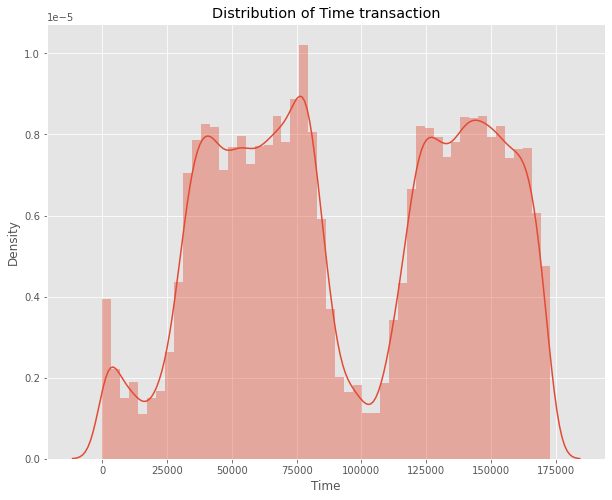

In [12]:
#visualizations of distribution of time transaction
plt.figure(figsize=(10,8))
plt.title('Distribution of Time transaction')
sns.distplot(df.Time)

We can conclude that the data set includes all transactions recorded over two days by converting it from seconds to hours. From the graph, we can see approximately 28 hours after the first transaction there is a significant drop in transactions.

/Users/chankifung/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribution of Monetary Value of transaction'}, xlabel='Amount', ylabel='Density'>

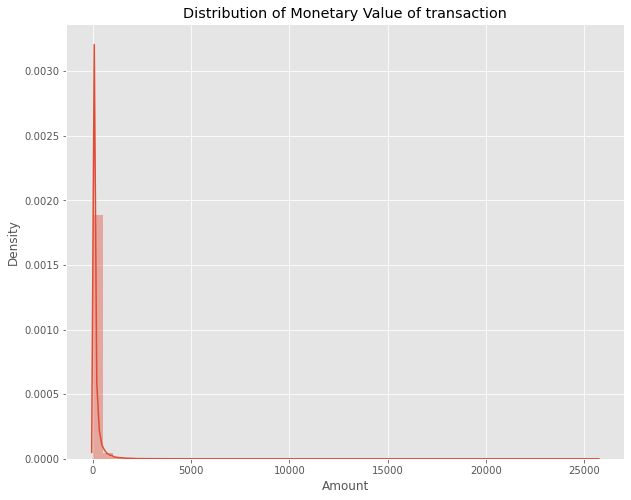

In [13]:
#visualizations of distribution of monetary value
plt.figure(figsize=(10,8))
plt.title('Distribution of Monetary Value of transaction')
sns.distplot(df.Amount)

The distribution of the transactions is heavily right-skewed, the data set's lower bounds are extremely low relative to the rest of the data
The majority of transactions are minor, and only a small percentage of them approach the maximum.

Text(0.5, 0, 'Class (0:Non-Fraudulent, 1:Fraudulent)')

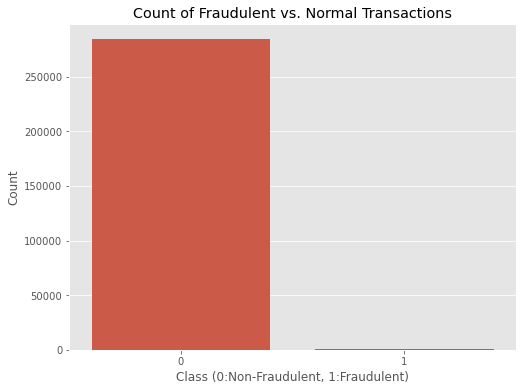

In [56]:
#visualization of differences between count of fraudulent and normal transactions
plt.figure(figsize=(8,6))
sns.barplot(x=counts.index, y=counts)
plt.title('Count of Fraudulent vs. Normal Transactions')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')

Most transactions are non-fraudulent. From the bar chart, we can see the significant contrast between the number of fraudulent transactions and normal transactions

In [21]:
#fraud vs. normal transactions (number and percent)
counts = df.Class.value_counts()
normal = counts[0]
fraudulent = counts[1]
perc_normal = (normal/(normal+fraudulent))*100
perc_fraudulent = (fraudulent/(normal+fraudulent))*100
print('There were {} non-fraudulent transactions ({:.2f}%) and {} fraudulent transactions ({:.2f}%).'.format(normal, perc_normal, fraudulent, perc_fraudulent))

There were 284215 non-fraudulent transactions (99.84%) and 442 fraudulent transactions (0.16%).


Since over 99% of the transactions are non-fraudulent, there is huge imbalance between the distribution of fraudulent and normal transactions

/Users/chankifung/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/chankifung/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


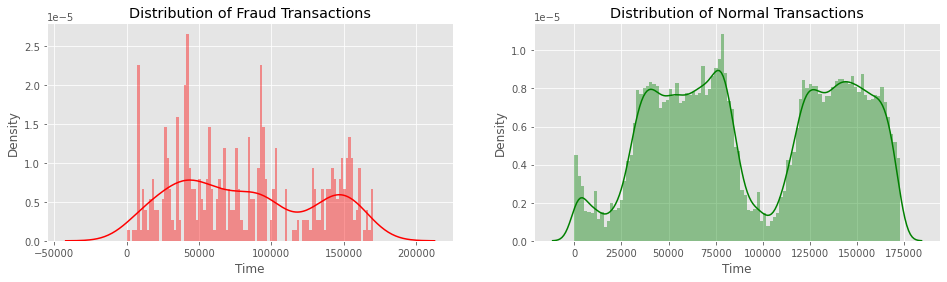

In [22]:
#visualization of distribution of fraud and normal transactions
fig, axs = plt.subplots(ncols=2, figsize=(16,4))

sns.distplot(df[(df['Class'] == 1)]['Time'],bins=100,color='red', ax=axs[0])
axs[0].set_title("Distribution of Fraud Transactions")

sns.distplot(df[(df['Class'] == 0)]['Time'], bins=100,color='green', ax=axs[1])
axs[1].set_title("Distribution of Normal Transactions")

plt.show()

Text(0.5, 1.0, 'Heatmap of Correlation')

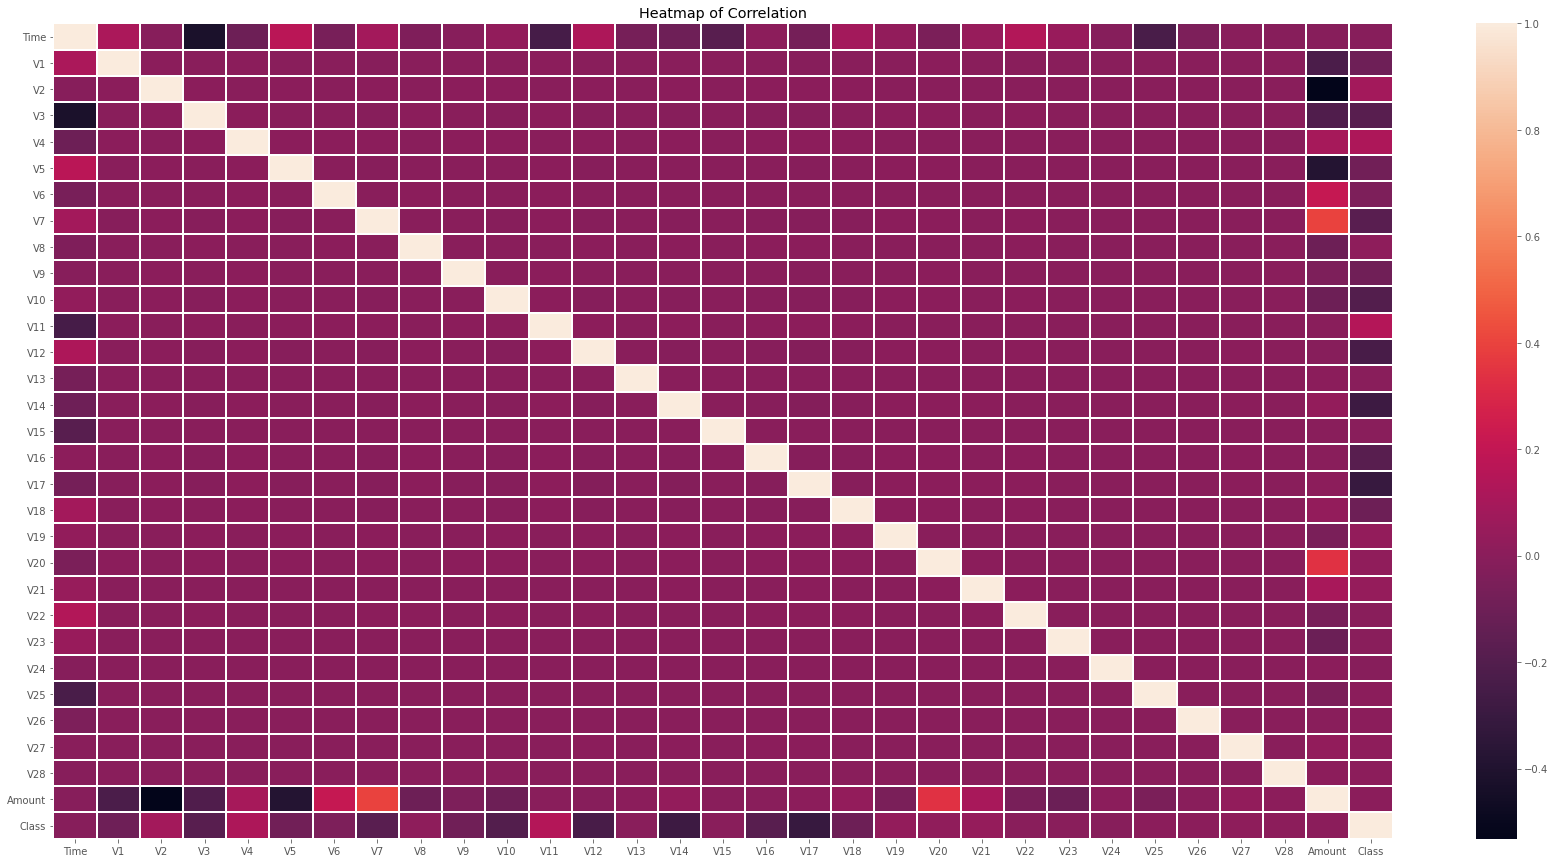

In [23]:
#heatmap of correlation
#To find out whether there are significant correlations  between predictors (mainly regards to the class variable)
plt.figure(figsize=(30,15))
df_corr=df.corr()
sns.heatmap(df_corr,linewidths=1,linecolor='white')
plt.title('Heatmap of Correlation')

But I can't find signifant correlations for those variables (It may be due to its large range)

In [24]:
#Scaling Amount and Time

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler2 = StandardScaler()
#scaling time
scaled_time = scaler.fit_transform(df[['Time']])
flat_list1 = [item for sublist in scaled_time.tolist() for item in sublist]
scaled_time = pd.Series(flat_list1)

In [25]:
#scaling the amount column
scaled_amount = scaler2.fit_transform(df[['Amount']])
flat_list2 = [item for sublist in scaled_amount.tolist() for item in sublist]
scaled_amount = pd.Series(flat_list2)

In [26]:
#concatenating newly created columns w original df
df = pd.concat([df, scaled_amount.rename('scaled_amount'), scaled_time.rename('scaled_time')], axis=1)
df.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,scaled_amount,scaled_time
202745,134523.0,-0.30,1.82,0.56,4.50,0.27,0.25,0.32,3.91e-01,-2.05,...,-0.19,0.03,-0.46,0.62,0.36,0.20,10.62,0,-0.31,0.84
213932,139512.0,-0.71,-0.14,0.87,-1.89,-0.48,-0.20,-0.57,4.82e-01,-0.90,...,-0.19,0.65,-0.13,-0.03,0.04,0.06,36.60,0,-0.21,0.94
116759,74446.0,-0.11,0.46,0.57,-0.88,0.65,0.15,0.37,-2.03e-03,0.41,...,-0.36,-1.27,0.04,-0.30,0.22,0.14,11.98,0,-0.31,-0.43
90138,62913.0,-0.38,0.99,1.35,-0.14,0.12,-0.63,0.65,-1.04e-03,-0.27,...,-0.08,-0.15,-0.15,0.10,0.26,0.11,1.78,0,-0.35,-0.67
239703,150290.0,1.79,0.06,-0.31,4.17,-0.13,0.21,-0.11,1.54e-01,0.10,...,0.30,-0.13,-0.24,-0.25,-0.03,-0.04,47.03,0,-0.17,1.17


In [27]:
#dropping old amount and time columns
df.drop(['Amount', 'Time'], axis=1, inplace=True)

Standardize the time and amount column (in order not to let machine learning algorithm tends to weigh greater values, higher and consider smaller values as the lower values, regardless of the unit of the values.)

In [28]:
#randomly select N normal observations of the same size as the N fraud observations
mask = np.random.rand(len(df)) <0.9
train = df[mask]

print('Train Shape: {}'.format(train.shape))


Train Shape: (256328, 31)


In [29]:
train.reset_index(drop=True, inplace=True)


In [30]:
#find how many random samples from normal transactions do we need
no_of_frauds = train.Class.value_counts()[1]
print('There are {} fraudulent transactions in the train data.'.format(no_of_frauds))

There are 401 fraudulent transactions in the train data.


In [31]:
#randomly selecting 403 random non-fraudulent transactions
non_fraud = train[train['Class'] == 0]
fraud = train[train['Class'] == 1]

In [32]:
selected = non_fraud.sample(no_of_frauds)
selected.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
15532,1.26,-0.51,0.76,0.15,-0.56,1.09,-1.08,0.34,-0.85,0.92,...,-0.18,-6.98e-02,-1.19,0.30,-0.28,0.10,0.02,0,-0.27,-1.39
78518,-0.96,1.05,1.04,-0.82,0.08,0.03,0.21,0.67,-0.43,-0.76,...,-0.21,-6.23e-02,-0.27,-0.25,0.33,0.19,0.10,0,-0.35,-0.70
49379,1.28,0.37,-0.03,0.50,0.13,-0.57,0.18,-0.23,-0.10,-0.33,...,-0.89,-4.41e-03,-0.47,0.36,0.14,-0.02,0.03,0,-0.28,-1.01
156904,-1.92,1.35,0.46,0.53,-0.38,1.00,-0.04,1.14,-0.39,-0.21,...,-0.86,-2.98e-01,-1.47,0.53,-0.59,0.13,0.02,0,0.06,0.57
127323,-2.99,-0.61,-0.88,2.04,-0.60,0.38,-0.68,1.37,0.03,-1.36,...,0.19,-5.33e-01,-0.76,-0.68,-0.27,-0.23,-0.28,0,0.21,-0.22


In [33]:
#concatenating it into a subsample data set with equal class distribution
selected.reset_index(drop=True, inplace=True)
fraud.reset_index(drop=True, inplace=True)

In [34]:
subsample = pd.concat([selected, fraud])
len(subsample)

802

In [35]:
#shuffling the data set
subsample = subsample.sample(frac=1).reset_index(drop=True)
subsample.head(10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,1.52,-0.52,-2.58,0.77,0.21,-1.43e+00,0.76,-0.44,1.00,-1.43,...,-0.21,-0.25,-0.28,0.24,-0.51,-0.02,0.04,1,0.75,0.74
1,-0.68,1.13,-2.21,0.47,-1.12,-3.35e-03,-2.23,1.21,-0.65,-3.46,...,0.83,0.19,0.03,-0.74,0.47,0.39,0.19,1,-0.04,1.57
2,-0.24,4.15,-5.67,6.49,1.59,-1.60e+00,-0.95,0.72,-4.13,-3.96,...,-0.48,-0.29,-1.15,-0.04,0.56,0.41,0.22,1,-0.35,1.32
3,-5.69,5.78,-7.06,5.90,-4.72,-1.76e+00,-6.96,3.88,-5.54,-7.50,...,-0.96,-0.11,-0.18,-0.09,-0.05,0.30,0.22,1,0.09,-1.24
4,-10.85,6.73,-16.76,8.43,-10.25,-4.19e+00,-14.08,7.17,-3.68,-15.24,...,0.14,-1.02,0.41,0.11,-0.03,-1.46,-0.41,1,-0.04,-0.02
5,-17.54,12.35,-20.13,11.12,-14.57,-3.82e-01,-23.93,-4.72,-8.60,-15.23,...,2.39,2.02,0.63,-1.09,-0.07,-3.84,-0.80,1,-0.31,0.05
6,-1.13,1.53,1.01,0.67,-0.54,-2.83e-01,-0.11,0.58,0.19,0.35,...,0.53,-0.16,-0.17,-0.10,-0.22,0.52,0.28,0,-0.33,-0.37
7,-15.82,8.78,-22.80,11.86,-9.09,-2.39e+00,-16.56,0.95,-6.31,-13.09,...,1.04,1.14,-1.04,-0.11,0.66,2.14,-1.41,1,-0.35,-1.57
8,-7.92,-5.20,-3.00,4.42,2.27,-3.39e+00,-5.28,0.13,0.66,-0.79,...,-0.60,-4.91,0.41,-1.17,0.52,1.94,-1.55,1,-0.30,-1.21
9,-0.59,0.14,1.32,-1.21,0.61,6.72e-01,1.22,-0.25,0.52,-0.52,...,-0.87,0.05,0.17,-0.36,-0.50,-0.32,-0.33,0,0.07,0.57


In [37]:
#removing extreme outliers
Q1 = subsample.quantile(0.25)
Q3 = subsample.quantile(0.75)
IQR = Q3 - Q1

df2 = subsample[~((subsample < (Q1 - 2.5 * IQR)) |(subsample > (Q3 + 2.5 * IQR))).any(axis=1)]

In [38]:
len_after = len(df2)
len_before = len(subsample)
len_difference = len(subsample) - len(df2)
print('We reduced our data size from {} transactions by {} transactions to {} transactions.'.format(len_before, len_difference, len_after))

We reduced our data size from 802 transactions by 228 transactions to 574 transactions.


**Module 3: Dimension Reduction**

In [39]:
#Dimension Reduction
from sklearn.manifold import TSNE

X = df2.drop('Class', axis=1)
y = df2['Class']

In [40]:
#t-SNE
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)

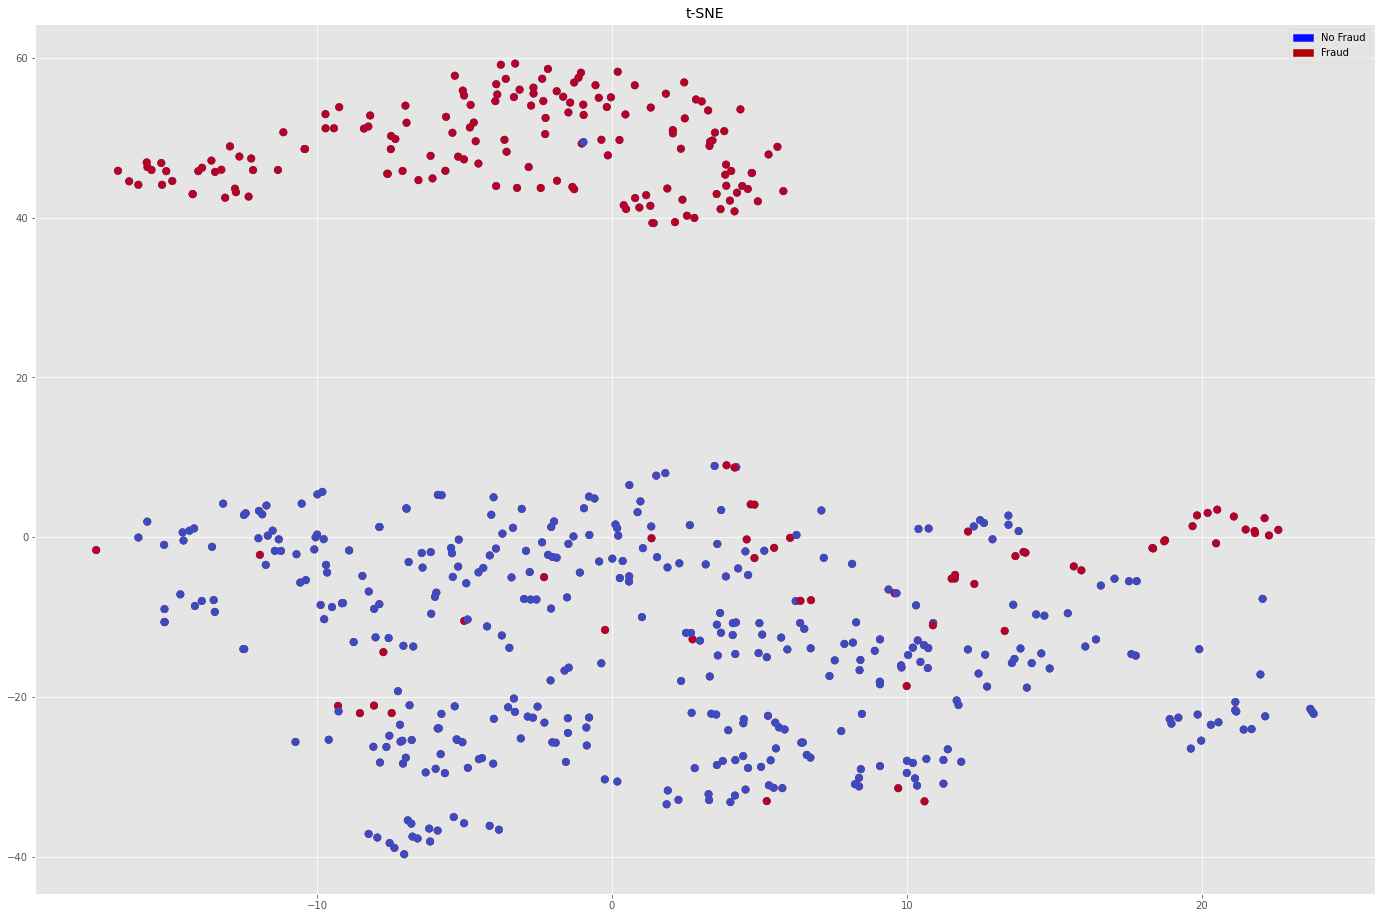

In [41]:
# t-SNE scatter plot
import matplotlib.patches as mpatches

f, ax = plt.subplots(figsize=(24,16))


blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')

ax.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax.set_title('t-SNE', fontsize=14)

ax.grid(True)

ax.legend(handles=[blue_patch, red_patch])

#Print a scatter plot which show the clusters of fradulent and normal fradulent transactions (two dimensional space)


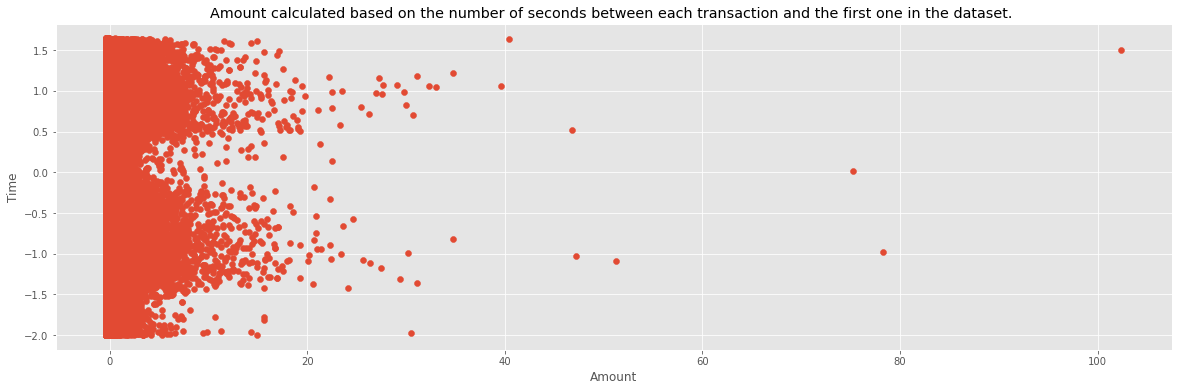

In [42]:
X=df['scaled_amount']
y=df['Class']

X=X.values.reshape(-1,1)
fig,ax=plt.subplots(figsize=(20,6))
ax.scatter(X,df['scaled_time'])
plt.title('Amount calculated based on the number of seconds between each transaction and the first one in the dataset. ')
plt.xlabel('Amount')
plt.ylabel('Time')
plt.show()

#Print a scatter plot which show the amount took with seconds elapsed between each transaction and the first transaction in the dataset (two dimensional space)

**Module 4: Classification**

In [55]:
#Show the shape of test file
df3.shape

(150, 31)

In [46]:
#fit the data to the data frame

x=df3.iloc[:,:-1]
y=df3.iloc[:,-1]
print(x.shape,y.shape)

(150, 30) (150,)


In [47]:
#Show the shape of x,y of train and test
#Do train test spilt,by ratio 0.8:0.2
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)

print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(120, 30)
(120,)
(30, 30)
(30,)


In [48]:
sc=StandardScaler()
xtrain=sc.fit_transform(xtrain)
xtest=sc.transform(xtest)

In [49]:
#Apply the model
def model_evaluate(model):
    model.fit(xtrain,ytrain)
    acc=model.score(xtest,ytest)
    
    print("Model Name",model)
    print("Acuuracy",acc)

In [50]:
#the overall accuracy
lr=LogisticRegression()
svm=SVC()
dt=DecisionTreeClassifier(max_depth=6)
rf=RandomForestClassifier(max_samples=0.9)
knn=KNeighborsClassifier(n_neighbors=5)

models=[lr,dt,rf,knn]

for model in models:
    model_evaluate(model)

Model Name LogisticRegression()
Acuuracy 0.9666666666666667
Model Name DecisionTreeClassifier(max_depth=6)
Acuuracy 0.9333333333333333
Model Name RandomForestClassifier(max_samples=0.9)
Acuuracy 0.9666666666666667
Model Name KNeighborsClassifier()
Acuuracy 0.9666666666666667


In [51]:
base_models=[('RF',RandomForestClassifier(max_samples=0.9)),('knn',KNeighborsClassifier(n_neighbors=5))]
meta_model = LogisticRegression()
stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model, passthrough=True, cv=3)

In [52]:
stacking_model.fit(xtrain, ytrain)
acc=stacking_model.score(xtest,ytest)

<AxesSubplot:>

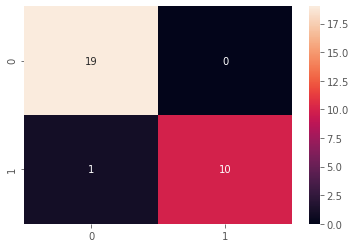

In [53]:
##generate the confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = stacking_model.predict(xtest)
conf_matrix = confusion_matrix(ytest, y_pred)
sns.heatmap(conf_matrix, annot = True, fmt='g')

In [54]:
#overall result include test precision,test recall,f1-score etc
from sklearn.metrics import classification_report
print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.97      0.95      0.96        30
weighted avg       0.97      0.97      0.97        30



**Module 5: Summary**

In [ ]:
# Let me summarize what I have done in the above 4 module and the findings:
# Module 1: Explore the dataset
# include explore the shape, info and numerical summary of the dataset,finding null value and deal with them,detect outliers.
# Module 2: Visualize the data
# include use different graph (e.g bar chart, heat map) to visualize 
# 2.1 Distribution of time transaction
# 2.2 Distribution of monetary value
# 2.3 Differences between count of fraudulent and normal transactions
# 2.4 Distribution of fraud and normal transactions
# 2.5 Correlations  between predictors
# Module 3: Dimension reduction
# Print two scatter plot which show:
# 3.1 the clusters of fradulent and normal fradulent transactions (two dimensional space)
# 3.2 amount took with seconds elapsed between each transaction and the first transaction in the dataset 
# (two dimensional space)
# Module 4: Classification
# 4.1 scaling and undersampling (randomly select N normal observations of the same size as the N fraud observations, and use N+N=2N samples)
# 4.2 remove outliers
# 4.3 apply the classification algorithm,evaluate my models and compare their performance


From this project, I find out that how data imbalance is a major challenge to deal with during building a model. As using the original data set would not be a good idea (over 99% of the transactions are non -fradulent, an algorithm would always predicts that the transaction is normal), and this is not what I want. I try to use techniques to deal with data imbalance for three different classification algorithms to try to detect fradulent transactions and label them as such. 